# NLP - Sentiment Analysis Hotel based on Review with Comparing Naive Bayes and SVM


In [1]:
#import library

import numpy as np
#import pandas
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import classification_report, confusion_matrix
#import Natural Language Toolkit
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

# Data Facts and Import

In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [4]:
rcParams['figure.figsize'] = 10, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [5]:
#import data
corpus = pd.read_csv("./Review's Hotel.csv")

In [6]:
#Check the shape (number of columns and rows) in the dataset
corpus.shape

(35912, 19)

In [7]:
print('Panjang Corpus : ',len(corpus))

Panjang Corpus :  35912


In [8]:
#Show data
corpus.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews_date,reviews_dateAdded,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_username,reviews_userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


# Exploratory Data Analysis

In [9]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               35912 non-null  object 
 1   categories            35912 non-null  object 
 2   city                  35912 non-null  object 
 3   country               35912 non-null  object 
 4   latitude              35826 non-null  float64
 5   longitude             35826 non-null  float64
 6   name                  35912 non-null  object 
 7   postalCode            35857 non-null  object 
 8   province              35912 non-null  object 
 9   reviews_date          35653 non-null  object 
 10  reviews_dateAdded     35912 non-null  object 
 11  reviews_doRecommend   0 non-null      float64
 12  reviews_id            0 non-null      float64
 13  reviews_rating        35050 non-null  float64
 14  reviews_text          35890 non-null  object 
 15  reviews_title      

In [10]:
#display descriptive statistics
corpus.describe()

,latitude,longitude,reviews_doRecommend,reviews_id,reviews_rating
count,35826.000000,35826.000000,0.0,0.0,35050.000000
mean,37.285008,-85.725758,NaN,NaN,3.776431
std,6.996544,33.062263,NaN,NaN,1.416195
min,-25.436750,-166.559040,NaN,NaN,0.000000
25%,33.827340,-104.868200,NaN,NaN,3.000000
50%,37.936026,-86.822972,NaN,NaN,4.000000
75%,41.672491,-77.044550,NaN,NaN,5.000000
max,63.877674,115.164407,NaN,NaN,10.000000


In [11]:

print('Mean of hotel reviews: ', round(corpus['reviews_rating'].mean()))

Mean of hotel reviews:  4


In [12]:
#Check for missing values in the dataset
corpus.isnull().sum(axis=0)

address                     0
categories                  0
city                        0
country                     0
latitude                   86
longitude                  86
name                        0
postalCode                 55
province                    0
reviews_date              259
reviews_dateAdded           0
reviews_doRecommend     35912
reviews_id              35912
reviews_rating            862
reviews_text               22
reviews_title            1622
reviews_userCity        19649
reviews_username           43
reviews_userProvince    18394
dtype: int64

In [13]:
#Checking Missing value in the dataset and printing the percentage for missing value for each column
count = corpus.isnull().sum().sort_values(ascending=False)
percentage = (corpus.isnull().sum()/corpus.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count', 'Percentage'])

print('Count and percentage of missing value for the columns:')
missing_data['Percentage']=missing_data['Percentage'].apply(lambda x: x*100)
missing_data.loc[missing_data['Percentage'] > 10][:10]


Count and percentage of missing value for the columns:


,Count,Percentage
reviews_id,35912,100.000000
reviews_doRecommend,35912,100.000000
reviews_userCity,19649,54.714302
reviews_userProvince,18394,51.219648


In [14]:
#check sum of each reviews_rating
review=pd.DataFrame(corpus.groupby('reviews_rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review

,reviews_rating,No of Users
0,5.0,12671
1,4.0,9755
2,3.0,5708
3,1.0,3068
4,2.0,2979
5,0.0,337
6,10.0,101
7,9.6,53
8,9.2,49
9,4.3,26


In [15]:
#check value unique rating
corpus['reviews_rating'].unique()

array([ 4. ,  5. ,  3. ,  1. ,  2. ,  0. ,  4.1,  nan,  4.9,  4.8,  3.4,
        2.4,  3.1,  3.2,  3.3,  9.6, 10. ,  8.3,  8.8,  9.2,  7.5,  7.9,
        7.1,  3.8,  5.8,  6.7,  6.3,  4.2,  4.5,  3.9,  1.3,  4.3,  4.7,
        2.8,  4.4,  1.5,  4.6,  3.7,  5.4,  2.5,  6. ,  2.9,  7. ,  9.5])

# Feature Engineering

In [16]:
#feature engineering, choose reviews_rating = 4 as neutal rating and set it = 0
corpus.loc[(corpus ['reviews_rating'] == 4)] = np.nan
reviews_rating = corpus['reviews_rating']
reviews_rating.fillna(value=0, inplace =True)

In [17]:
#delete features that are not needed in data
corpus.drop(['latitude','longitude','reviews_doRecommend', 'reviews_dateAdded', 'reviews_date', 'province', 'postalCode','reviews_userProvince', 'reviews_id', 'reviews_userCity'],axis=1,inplace=True)

In [18]:
corpus['reviews_rating'].unique()

array([ 0. ,  5. ,  3. ,  1. ,  2. ,  4.1,  4.9,  4.8,  3.4,  2.4,  3.1,
        3.2,  3.3,  9.6, 10. ,  8.3,  8.8,  9.2,  7.5,  7.9,  7.1,  3.8,
        5.8,  6.7,  6.3,  4.2,  4.5,  3.9,  1.3,  4.3,  4.7,  2.8,  4.4,
        1.5,  4.6,  3.7,  5.4,  2.5,  6. ,  2.9,  7. ,  9.5])

In [19]:
# feature engineering by create rating implicit and explicit
ratings_explicit= corpus[corpus['reviews_rating'] != 0]
ratings_implicit= corpus[corpus['reviews_rating'] == 0]

In [20]:
# set corpus as dataframe of ratings_explicit
corpus = ratings_explicit

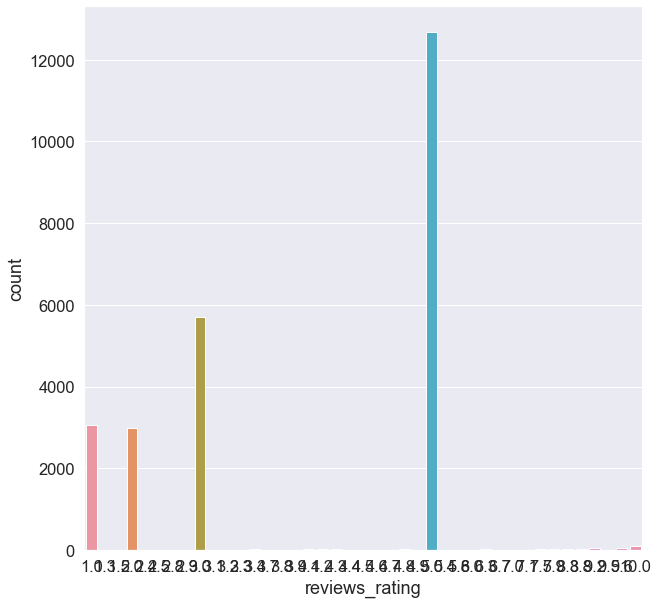

In [21]:
#create visualization ratings_explicit of reviews_rating distribution
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='reviews_rating')
plt.show()

In [22]:
for i in range(0,len(corpus)-1):
    if type(corpus.iloc[i]['reviews_text']) != str:
        corpus.iloc[i]['reviews_text'] = str(corpus.iloc[i]['reviews_text'])

C:\Users\Lenovo\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
#labeling data
def sentiment(n):
    return 'positive' if n >= 5 else 'negative'
corpus['response'] = corpus['reviews_rating'].apply(sentiment)
corpus.head()

,address,categories,city,country,name,reviews_rating,reviews_text,reviews_title,reviews_username,response
1,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,A Traveler,positive
2,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,Maud,positive
3,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,Julie,positive
4,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,5.0,We stayed here for four nights in October. The...,������ ���������������,sungchul,positive
5,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,5.0,We loved staying on the island of Lido! You ne...,Very nice hotel,A Traveler,positive


In [24]:
#check corpus
corpus[['reviews_text','response']]

,reviews_text,response
1,Really lovely hotel. Stayed on the very top fl...,positive
2,Ett mycket bra hotell. Det som drog ner betyge...,positive
3,We stayed here for four nights in October. The...,positive
4,We stayed here for four nights in October. The...,positive
5,We loved staying on the island of Lido! You ne...,positive
...,...,...
35905,We truly enjoyed staying at the Elk Springs re...,positive
35906,We were here for a 2nd time the last weekend o...,positive
35907,Best of the Best!!!! My family and I stayed in...,positive
35908,Amazing Vacation in Beautiful Cabin We stayed ...,positive


In [25]:
corpus.sample(10)

,address,categories,city,country,name,reviews_rating,reviews_text,reviews_title,reviews_username,response
25252,7865 Perry Hwy,"Hotels,Hotels & Motels,Hotel",Erie,US,Red Roof Inn Erie,5.0,"The room was nice. It was pretty quiet, even t...","Pretty good, and good price",Susan C,positive
10857,703 S Negley Ave,"Bed & Breakfasts,Weekend Getaway Hotels,Hotels...",Pittsburgh,US,The Inn On Negley,5.0,I had the very good fortune of visiting Pittsb...,My favorite BB!!,carnetdevoyage,positive
11989,Via Pirandello 81,Hotels,Medina,US,Villa Carlotta,5.0,Fantastic welcoming. Beautiful rooms amazing b...,Just wonderful,A Traveler,positive
1752,926 J St,"Hotels,Hotel",Sacramento,US,"The Citizen Hotel, Autograph Collection",5.0,This is a gorgeous hotel! We had our wedding h...,NaN,knschroeder,positive
24828,125 W 26th St,"Conventions Conferences & Trade Shows,Wedding ...",New York,US,Holiday Inn Manhattan 6th Ave - Chelsea,3.0,"Take a room in the upper floors, breathtaking ...",NaN,Manuel Enrico,negative
15431,95 Route 17k,Hotels,Newburgh,US,Howard Johnson Inn - Newburgh,2.0,"It was ok, they definitely need new towels.",We had expected much more from Howard Johnson,A verified traveler,negative
7228,2707 Veterans Ave,"Travel & Transport,Hotels,Hotels & Motels",Vandalia,US,Ramada Vandalia,2.0,They could not find my reservation therefore I...,They could not find my reservation . Double ch...,Paul,negative
6403,3614 W Garriott Rd,Hotels,Enid,US,Baymont Inn and Suites Enid,1.0,"The rooms are very average, but the main reaso...",Worst manager in the history of Hotels!,Gail,negative
35402,1350 W Atlantic St,"Wedding Sites,Hotels,Hotels & Motels,Meeting F...",Emporia,US,Holiday Inn Express Hotel & Suites Emporia,5.0,Just a stop point on way home,Nice respite.,Lawrence A,positive
15333,95 Route 17k,Hotels,Newburgh,US,Howard Johnson Inn - Newburgh,3.0,I stayed here cause the rate was right but whe...,Only ok nothing great,JANEEN N,negative


In [26]:
corpus[['reviews_text','response']]

,reviews_text,response
1,Really lovely hotel. Stayed on the very top fl...,positive
2,Ett mycket bra hotell. Det som drog ner betyge...,positive
3,We stayed here for four nights in October. The...,positive
4,We stayed here for four nights in October. The...,positive
5,We loved staying on the island of Lido! You ne...,positive
...,...,...
35905,We truly enjoyed staying at the Elk Springs re...,positive
35906,We were here for a 2nd time the last weekend o...,positive
35907,Best of the Best!!!! My family and I stayed in...,positive
35908,Amazing Vacation in Beautiful Cabin We stayed ...,positive


In [27]:
review_positif = len([x for x in corpus['response'] if x == 'positive'])
review_negatif = len([x for x in corpus['response'] if x == 'negative'])
print('Positive Reviews : ',review_positif)
print('Negative Reviews : ',review_negatif)

Positive Reviews :  13028
Negative Reviews :  11930


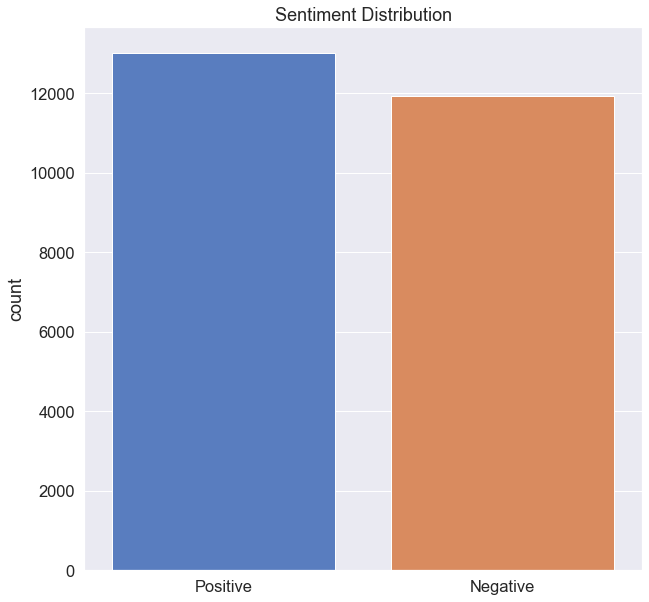

In [28]:
#show the sentiment distribution
f = sns.countplot(x='response', data=corpus)
f.set_title("Sentiment Distribution")
f.set_xticklabels(['Positive', 'Negative'])
plt.xlabel("");

# Text Cleaning

In [29]:
#Regular Expression method to search for matching texts
tokenizer = WordPunctTokenizer()
review_handle = r'@[A-Za-z0-9_]+'                         # remove review handle (@username)
url_handle = r'http[^ ]+'                                  # remove website URLs that start with 'https?://'
combined_handle = r'|'.join((review_handle, url_handle))  # join
www_handle = r'www.[^ ]+'                                  # remove website URLs that start with 'www.'
punctuation_handle = r'\W+'

In [30]:
#import text file of stop words, stop words are the most common words in a language that adds no semantics meaning to a sentence
stopwords = set(pd.read_csv('./stop-word-list.txt', sep='\n', header=0).stopword)

In [31]:
#define a function called process_text to process the text using the methods listed
# case folding
# remove punctuation
# stopword removal
# remove review handle (@username)
# remove website URLs that start with 'https?://'
# remove website URLs that start with 'www.'
# tokenization
import lxml

def process_text(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()

    try:
        text = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        text = souped

    cleaned_text = re.sub(punctuation_handle, " ",(re.sub(www_handle, '', re.sub(combined_handle, '', text)).lower()))
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in stopwords])

    return (" ".join([word for word in tokenizer.tokenize(cleaned_text) if len(word) > 1])).strip()

In [32]:
word = "cause youre strong, you are wise"

In [33]:
#test the above text cleaning method
import lxml
example_text = "Stayed with parents, wife twin toddlers in two triple rooms. The hotel is easy to reach and the rooms were well placed well furnished. The best feature was extremely friendly helpful staff, particularly Ms. Annalucia Ms. Anna who were always ready to listen help out with big smiles. The breakfasts were very good, with good spread and the guests were made welcome to sit and eat at leisure (more important when you are with toddlers!) Would surely go back to Venice would happily stay again at Russo Palace."

process_text(example_text)

'stayed parents wife twin toddlers triple rooms hotel easy reach rooms placed furnished best feature extremely friendly helpful staff particularly ms annalucia ms anna ready listen help big smiles breakfasts good good spread guests welcome sit eat leisure important toddlers surely venice happily stay russo palace'

In [ ]:
cleaned_text = []
for text in corpus.reviews_text:
  cleaned_text.append(process_text(text))
  clean_text = pd.DataFrame({'clean_text' : cleaned_text})
  corpus = pd.concat([corpus, clean_text], axis = 1)
  corpus.sample(5)

# Splitting Train Data

In [ ]:
from sklearn.model_selection import train_test_split

attribute = corpus.clean_text
target = corpus.reviews_text

In [ ]:
attribute_train, attribute_test, target_train, target_test = train_test_split(attribute, target, test_size = 0.1, random_state = 225)

print('attribute_train :', len(attribute_train))
print('attribute_test  :', len(attribute_test))
print('target_train :', len(target_train))
print('target_test  :', len(target_test))

# Support Vector Machine

In [ ]:
#importing lib
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import pickle

get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
#read data
corpus = pd.read_csv('D:/MATA KULIAH/SEMESTER 7/PBA/Proyek/7282_1.csv')

In [ ]:
def sentiment(n):
    return 'positive' if n >= 4 else 'negative'
corpus['response'] = corpus['reviews_rating'].apply(sentiment)
corpus.head()

In [ ]:
#cek review pos dan neg dalam corpus
review_positif = len([x for x in corpus['response'] if x == 'positive'])
review_negatif = len([x for x in corpus['response'] if x == 'negative'])
print('Review Positif : ',review_positif)
print('Review Negatif : ',review_negatif)


In [ ]:
import string
#remove punctuation
no_punctuations=[]
i=0
for word in corpus['reviews_text']:
    for punctuation in string.punctuation:
        text = text.replace(punctuation,"")
    for number in '1234567890':
        text = text.replace(number,"")
    corpus['reviews_text'][i] = word
    i = i+1
    
corpus['reviews_text'].head()
    

In [ ]:

x = corpus['reviews_text']
y = corpus['response']


In [ ]:
#stopword remove, dan tokenisasi
vect = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)


# In[10]:


#create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1, test_size= 0.2)


# In[11]:


#Using training data to transform text into counts of features for each review
vect.fit(X_train)


# In[12]:


X_train_dtm = vect.transform(X_train) 


# In[13]:


X_test_dtm = vect.transform(X_test)


# In[14]:


#Creating model using multinomial naive bayes
NB = MultinomialNB()
NB.fit(X_train_dtm, y_train)
y_pred = NB.predict(X_test_dtm)


# In[15]:


#Check the pos vs neg review
tokens_words = vect.get_feature_names()
print('Analysis')
print('No. of tokens: ',len(tokens_words))
counts = NB.feature_count_
df_table = {'Token':tokens_words,'Negative': counts[0,:],'Positive': counts[1,:]}
tokens = pd.DataFrame(df_table, columns= ['Token','Positive','Negative'])
positives = len(tokens[tokens['Positive']>tokens['Negative']])
negatives = len(tokens_words)-positives
print('No. of positive tokens: ',positives)
print('No. of negative tokens: ',negatives)


# In[16]:


#Accuracy SVM
SVM = LinearSVC()
SVM.fit(X_train_dtm, y_train)
y_pred = SVM.predict(X_test_dtm)
print('Support Vector Machine')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')

